# Homework 4

### Problem 1 SVM

#### (a) Use datasets.make_moons in sklearn package to generate a dataset with 200 samples with random noise. Visualize positive and negative instances with different colors. Split the dataset into training set and test set by 7:3.

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Generate a dataset with 200 samples with random noise
X, y = make_moons(n_samples=200, noise=0.1, random_state=0)

# print(X)
# print(y)
print(X.shape)
print(y.shape)

(200, 2)
(200,)


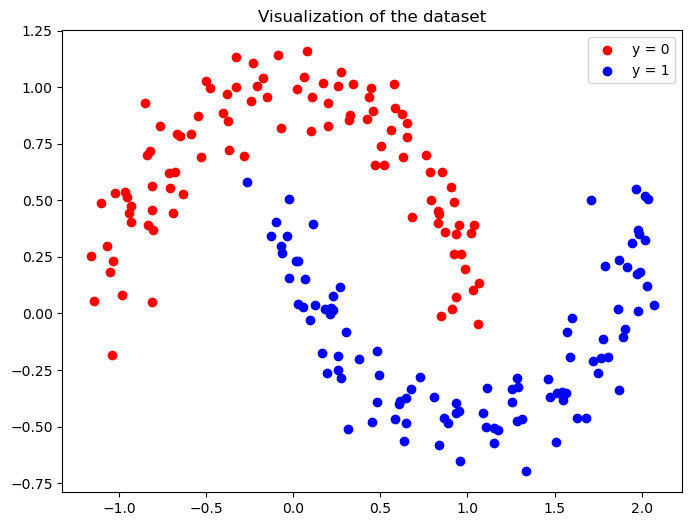

In [3]:
# Visualize  positive and negative instances with red and blue colors
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='y = 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y = 1')
plt.legend()
plt.title('Visualization of the dataset')
plt.show()

In [4]:
# Split the dataset into training and test sets by 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### (b) Use SVM model in sklearn to fit the training data with “RBF” kernel. Try parameter C with different values, i.e. [0.05, 0.1, 1, 2, 5, 10, 50, 100]. Visualize the decision boundary and support vectors along with the plot in part (a). What effects does parameter C have on the model?

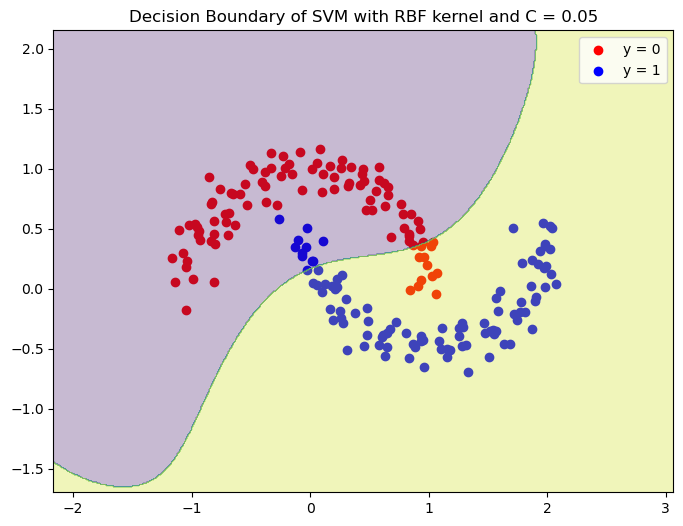

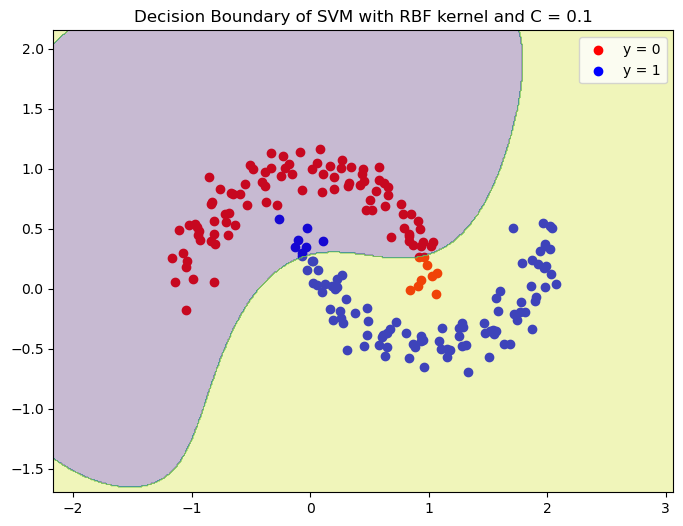

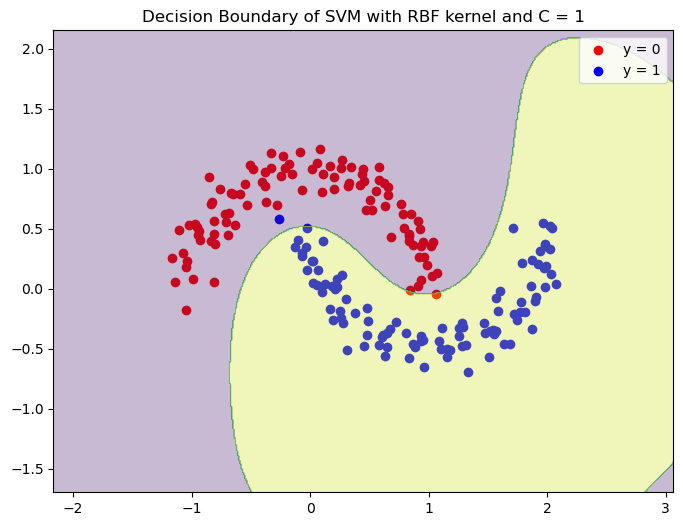

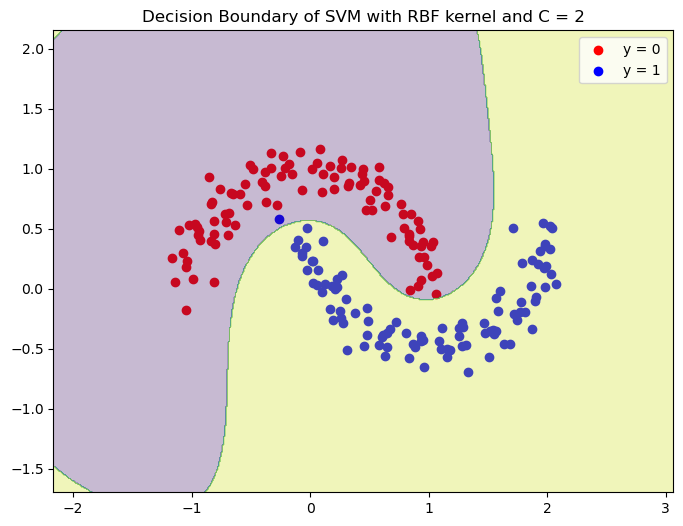

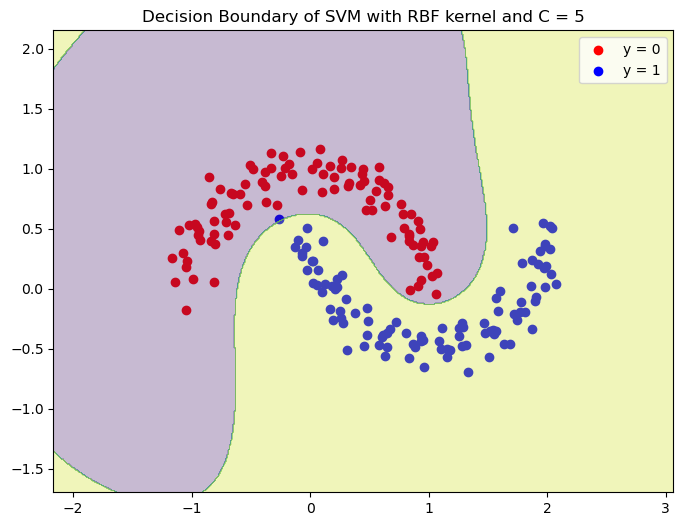

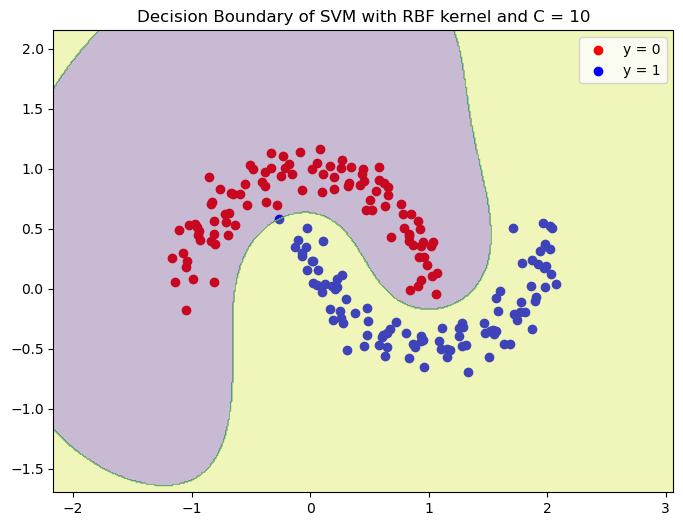

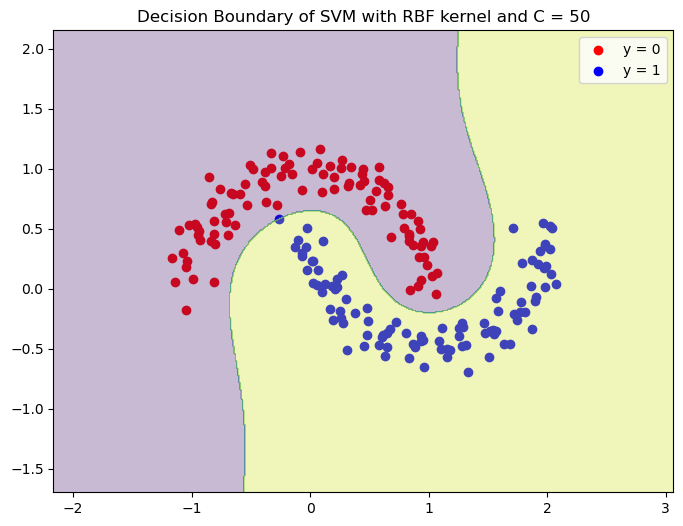

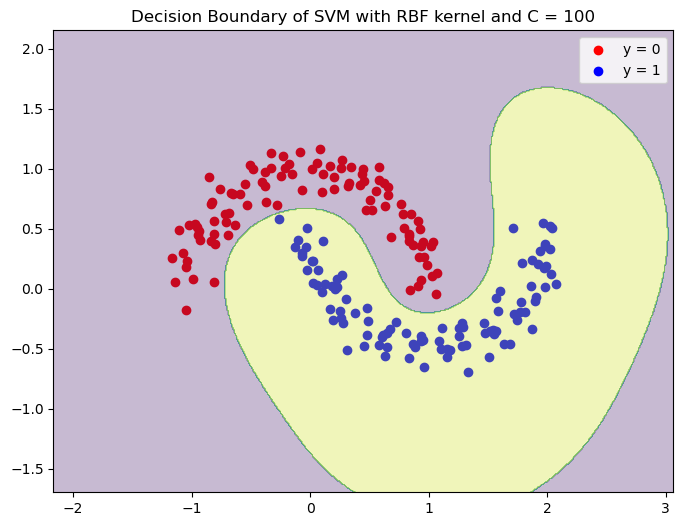

In [5]:
# Use SVM with RBF kernel with different values of C
C_values = [0.05, 0.1, 1, 2, 5, 10, 50, 100]

for C in C_values:
    # Create a SVM model with RBF kernel
    svm = SVC(kernel='rbf', C=C, random_state=0)

    # Train the model
    svm.fit(X_train, y_train)

    # Visualize the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='y = 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y = 1')

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    # Plot the decision boundary
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.legend()
    plt.title('Decision Boundary of SVM with RBF kernel and C = ' + str(C))
    plt.show()

##### According to the above plots, a large C generates a more complex decision boundary that closely fits the training dataset but increases the risk of overfitting. In contrast, a small C creates a smoother decision boundary, allowing some misclassifications while likely improving generalization.

#### (c) We have learned in class that kernel functions allow for learning in high-dimensional feature spaces without explicit mapping into feature space. Sklearn provides common kernels like ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’. Train the models using different kernels and visualize decision boundaries. Evaluate the models with test accuracy. Which kernel gives the best performance on the test dataset?

In [6]:
# Different kernel functions: linear, polynomial, rbf, and sigmoid
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

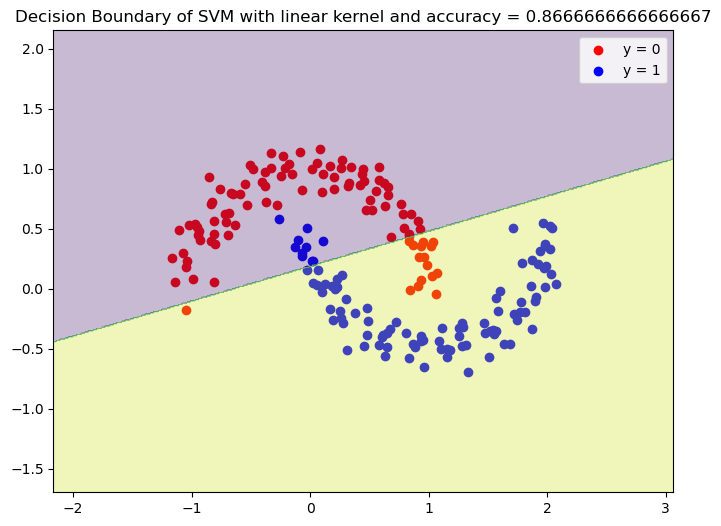

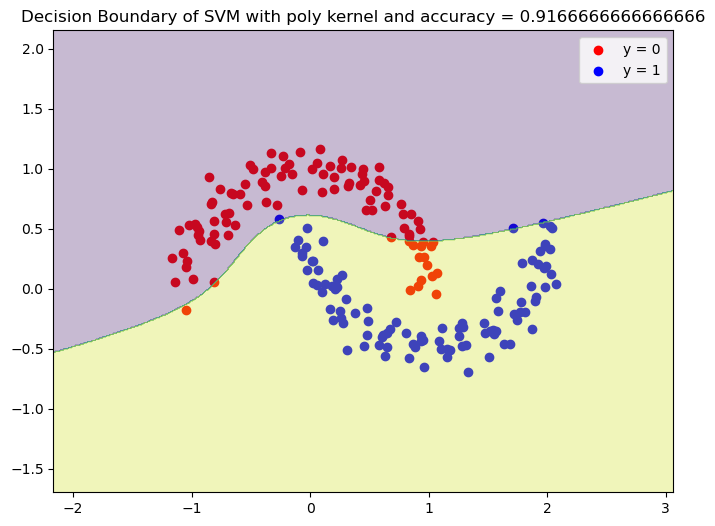

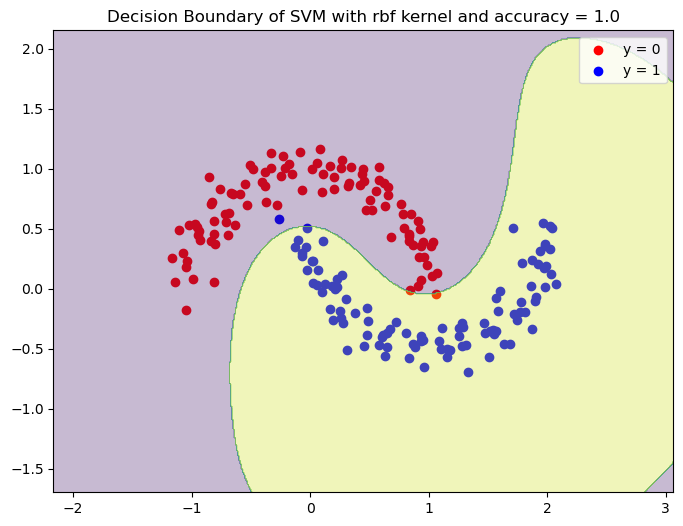

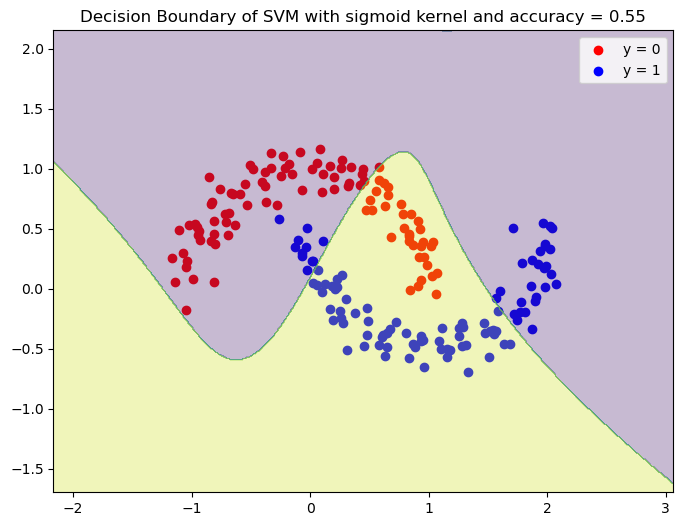

In [7]:
# Plot the decision boundary of all these models
for kernel in kernels:
    # Create a SVM model with the kernel
    svm = SVC(kernel=kernel, random_state=0)

    # Train the model
    svm.fit(X_train, y_train)

    # Accuracy of the model
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Visualize the data points
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='y = 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='y = 1')

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                         np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))

    # Plot the decision boundary
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.legend()
    plt.title('Decision Boundary of SVM with ' + kernel + ' kernel' + ' and accuracy = ' + str(accuracy))
    plt.show()

##### From the above plots, rbf kernel generates the best performance on the test dataset.

### Problem 2 Artificial Neural Networks

#### (1) Consider the following two activation functions: The sigmoid function $ f_1(x) = \frac{1}{1 + e^{-x}} $ and the hyperbolic tangent function $ f_2(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $ show that: $$ f_1'(x) = f_1(x) \cdot \big(1 - f_1(x)\big) $$ $$ f_2'(x) = 1 - f_2^2(x) $$

<img src="ESE417 HW4_P2_1.png">

#### (2) Learn how to use the MLP (multi-layer perceptron) model in sklearn package by reading corresponding sections from sklearn documentations (https://scikit-learn.org/stable/).

#### (3) Design your MLP model and apply the MLP classifier from sklearn package to the digits data set. Find the best number of hidden nodes that achieves the best classification result.

In [8]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# print(X)
# print(y)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [10]:
# Split the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Create the parameter grid for the number of hidden nodes
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (40,), (60,), (80,), 
                           (100,), (120,), (140,), (160,), (180,)],
}

In [12]:
# Create the MLP classifier and apply GridSearchCV
mlp = MLPClassifier(max_iter=1000, random_state=0)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=0),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (20,), (40,), (60,),
                                                (80,), (100,), (120,), (140,),
                                                (160,), (180,)]},
             scoring='accuracy')

In [13]:
# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_['mean_test_score'])

{'hidden_layer_sizes': (120,)}
0.9761303990387656
[0.93240688 0.95227661 0.96419402 0.96579081 0.96420667 0.96579713
 0.9761304  0.97055587 0.96580029 0.97294947]


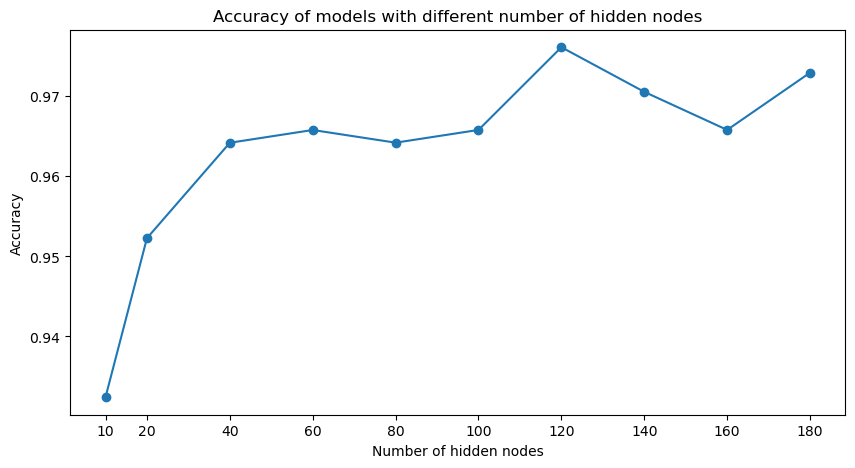

In [14]:
# Plot the accuracy of models with different number of hidden nodes
plt.figure(figsize=(10, 5))
plt.plot([10, 20, 40, 60, 80, 100, 120, 140, 160, 180],
          grid_search.cv_results_['mean_test_score'], marker='o')
plt.xlabel('Number of hidden nodes')
plt.ylabel('Accuracy')
plt.xticks([10, 20, 40, 60, 80, 100, 120, 140, 160, 180])
plt.title('Accuracy of models with different number of hidden nodes')
plt.show()

##### After the above calculations, the MLP classifier with 120 hidden nodes achieved the best performance, attaining an accuary of 0.976